ThinkDSP, by Allen Downey (think-dsp.com)

This notebook contains code examples from Chapter 4: Noise

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import math
import numpy

%precision 3
%matplotlib inline

The simplest noise to generate is uncorrelated uniform (UU) noise:

In [3]:
signal = thinkdsp.UncorrelatedUniformNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

Here's what a segment of it looks like:

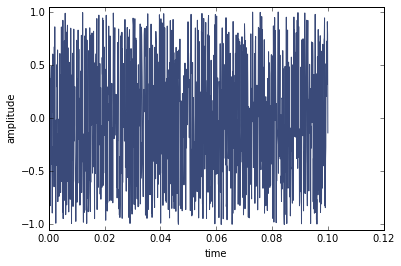

In [4]:
segment = wave.segment(duration=0.1)
segment.plot(linewidth=1)
thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 ylim=[-1.05, 1.05],
                 legend=False)

And here's the spectrum:

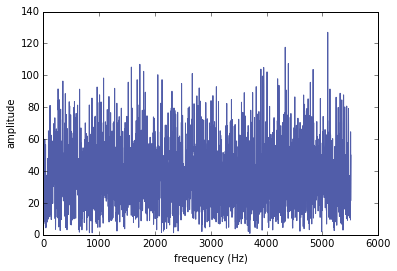

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth=1)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='amplitude',
                 legend=False)

In the context of noise it is more conventional to look at the spectrum of power, which is the square of amplitude:

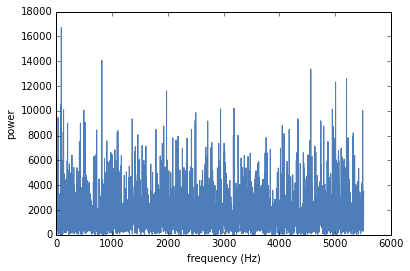

In [5]:
spectrum.plot_power(linewidth=1)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 legend=False)

UU noise has the same power at all frequencies, on average, which we can confirm by looking at the normalized cumulative sum of power, which I call an integrated spectrum:

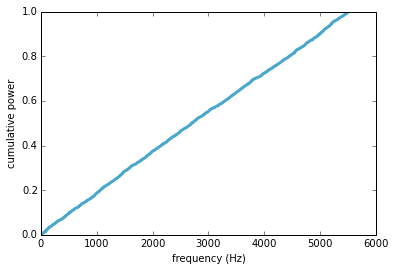

In [6]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
thinkplot.config(xlabel='frequency (Hz)',
                ylabel='cumulative power',
                legend=False)

A straight line in this figure indicates that UU noise has equal power at all frequencies, on average.  By analogy with light, noise with this property is called "white noise".

Brownian noise is generated by adding up a sequence of random steps.

In [7]:
signal = thinkdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
wave.make_audio()

The sound is less bright, or more muffled, than white noise.

Here's what the wave looks like:

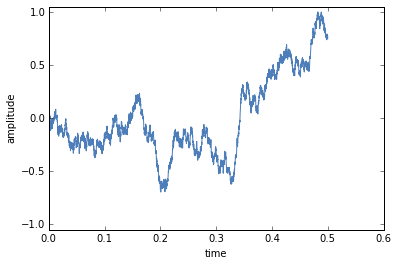

In [8]:
wave.plot(linewidth=1)
thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 ylim=[-1.05, 1.05],
                 legend=False)

Here's what the power spectrum looks like on a linear scale.

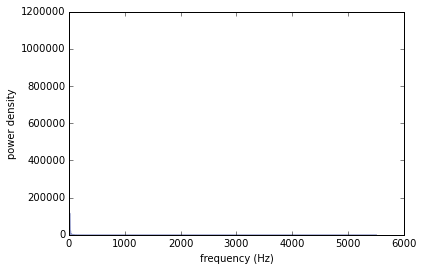

In [9]:
spectrum = wave.make_spectrum()
thinkplot.preplot(1)
spectrum.plot_power(low=1, linewidth=1, alpha=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power density',
                 legend=False)

So much of the energy is at low frequencies, we can't even see the high frequencies.

We can get a better view by plotting the power spectrum on a log-log scale.

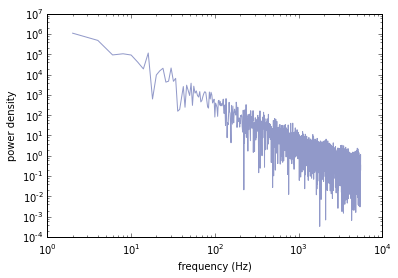

In [10]:
spectrum = wave.make_spectrum()
thinkplot.preplot(1)
spectrum.plot_power(low=1, linewidth=1, alpha=0.5)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power density',
                 xscale='log',
                 yscale='log',
                 legend=False)

Now the relationship between power and frequency is clearer.  The slope of this line is approximately -2, which indicates that $P = K / f^2$, for some constant $K$.

In [11]:
signal = thinkdsp.BrownianNoise()
wave = signal.make_wave(duration=0.5, framerate=11025)
spectrum = wave.make_spectrum()
spectrum.estimate_slope()

(-1.824, 13.624, -0.815, 0.000, 0.025)

The estimated slope of the line is closer to -1.8 than -2, for reasons we'll see later.

Pink noise is characterized by a parameter, $\beta$, usually between 0 and 2.  You can hear the differences below.

With $\beta=0$, we get white noise:

In [12]:
signal = thinkdsp.PinkNoise(beta=0)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

With $\beta=1$, pink noise has the relationship $P = K / f$, which is why it is also called $1/f$ noise.

In [13]:
signal = thinkdsp.PinkNoise(beta=1)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

With $\beta=2$, we get Brownian (aka red) noise.

In [14]:
signal = thinkdsp.PinkNoise(beta=2)
wave = signal.make_wave(duration=0.5)
wave.make_audio()

The following figure shows the power spectrums for white, pink, and red noise on a log-log scale.

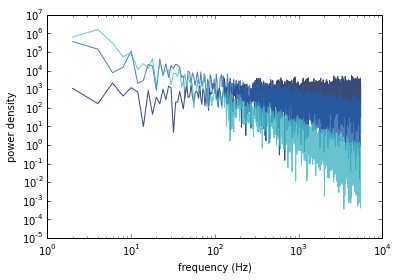

In [15]:
thinkplot.preplot(3)
for beta in [0, 1, 2]:
    signal = thinkdsp.PinkNoise(beta=beta)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    spectrum.plot_power(linewidth=1)
    
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power density',
                 xscale='log',
                 yscale='log',
                 ylim=[1e-5, 1e7],
                 legend=False)

An alternative to UU noise is uncorrelated Gaussian (UG noise).

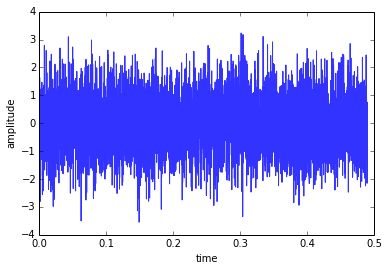

In [16]:
signal = thinkdsp.UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=0.49, framerate=11025)
wave.plot(linewidth=1)
thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 legend=False)

The spectrum of UG noise is also UG noise.

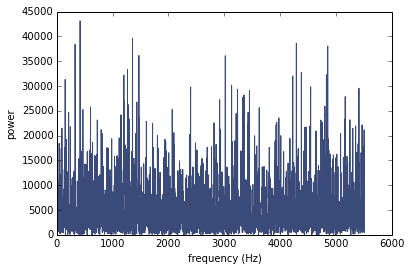

In [17]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth=1)
thinkplot.config(xlabel='frequency (Hz)',
                 ylabel='power',
                 legend=False)

We can use a normal probability plot to test the distribution of the power spectrum.

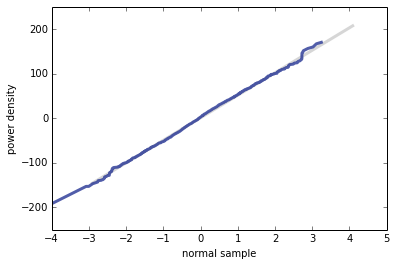

In [18]:
import thinkstats2 

thinkstats2.NormalProbabilityPlot(spectrum.real, label='real')
thinkplot.config(xlabel='normal sample',
                 ylabel='power density',
                 ylim=[-250, 250],
                 loc='lower right')

A straight line on a normal probability plot indicates that the distribution of the real part of the spectrum is Gaussian.

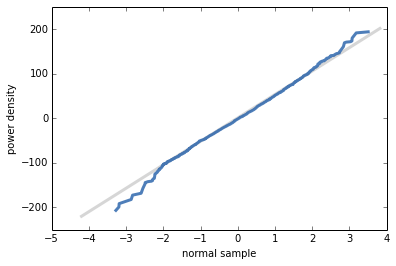

In [19]:
thinkstats2.NormalProbabilityPlot(spectrum.imag, label='real')
thinkplot.config(xlabel='normal sample',
                 ylabel='power density',
                 ylim=[-250, 250],
                 loc='lower right')

And so is the imaginary part.